In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

EDA-1

In [2]:
df = pd.read_csv('/content/BIKE DETAILS.csv')
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


#1.What is the range of selling prices in the dataset?

In [ ]:
price_range = df['selling_price'].max() - df['selling_price'].min()
print(f'The range of selling price is: {price_range}')

The range of selling price is: 755000


#2. What is the median selling price for bikes in the dataset?

In [ ]:
df['selling_price'].median()

45000.0

#3.What is the most common seller type?

In [ ]:
df['seller_type'].value_counts()


,count
seller_type,
Individual,1055
Dealer,6


In [ ]:
#4.How many bikes have driven more than 50,000 kilometers?
df[df['km_driven']>50000].shape[0]

170

In [ ]:
#5.What is the average km_driven value for each ownership type?
df.groupby('owner')['km_driven'].mean()


,km_driven
owner,
1st owner,32816.583333
2nd owner,39288.991870
3rd owner,33292.181818
4th owner,311500.000000


In [ ]:
#6.What proportion of bikes are from the year 2015 or older?
df[df['year']>=2015].shape[0]/df.shape[0]


0.527803958529689

In [ ]:
#7.What is the trend of missing values across the dataset?
missing_counts = df.isnull().sum()
missing_summary = pd.DataFrame({
    'missing_count': missing_counts,
    'missing_percent': (missing_counts / len(df)) * 100
}).sort_values(by='missing_percent', ascending=False)
missing_summary = missing_summary[missing_summary['missing_count'] > 0]
print(missing_summary)


                   missing_count  missing_percent
ex_showroom_price            435        40.999057


In [ ]:
#8.What is the highest ex_showroom_price recorded, and for which bike?
df = df.dropna(subset=['ex_showroom_price', 'name'])
max_price_row = df.loc[df['ex_showroom_price'].idxmax()]
print("Highest Ex-Showroom Price:")
print(f"Bike Name: {max_price_row['name']}")
print(f"Ex-Showroom Price: ₹{max_price_row['ex_showroom_price']}")


Highest Ex-Showroom Price:
Bike Name: Harley-Davidson Street Bob
Ex-Showroom Price: ₹1278000.0


In [ ]:
#9.What is the total number of bikes listed by each seller type?
total_bikes_by_seller = df.groupby('seller_type').size()
print(total_bikes_by_seller)


seller_type
Dealer           6
Individual    1055
dtype: int64


In [23]:
#10.What is the relationship between selling_price and km_driven for first-owner bikes?
first_owner_bikes = df[df['owner'] == '1st Owner']
if not first_owner_bikes.empty:
    plt.figure(figsize=(10, 6)) # Optional: adjust figure size
    plt.scatter(first_owner_bikes['selling_price'], first_owner_bikes['km_driven'], alpha=0.5)
    plt.xlabel('Selling price')
    plt.ylabel('KM Driven')
    plt.title('Relationship between Selling Price and KM Driven for First-Owner Bikes')
    plt.grid(True)
    plt.show()
else:
    print("No 'First Owner' bikes found in the dataset.")

# Optional: Check unique values in 'owner' column to understand why first_owner_bikes might be empty
    print(df['owner'].value_counts())

No 'First Owner' bikes found in the dataset.
owner
1st owner    924
2nd owner    123
3rd owner     11
4th owner      3
Name: count, dtype: int64


In [ ]:
#11.Identify and remove outliers in the km_driven column using the IQR method.

Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_no_outliers = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]

# Optional: print summary
print("Original size:", len(df))
print("After outlier removal:", len(df_no_outliers))

Original size: 1061
After outlier removal: 1022


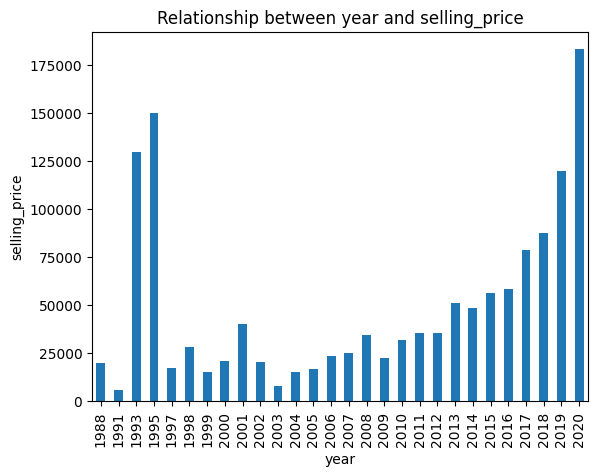

In [ ]:
#12.Perform a bivariate analysis to visualize the relationship between year and selling_price.
df.groupby('year')['selling_price'].mean().plot(kind='bar')
plt.title('Relationship between year and selling_price')
plt.xlabel('year')
plt.ylabel('selling_price')
plt.show()


In [ ]:
#13.What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)?
CURRENT_YEAR = 2025
df['age'] = CURRENT_YEAR - df['year']
df = df.dropna(subset=['age', 'selling_price'])
df = df[df['age'] >= 0]
avg_price_by_age = df.groupby('age')['selling_price'].mean().reset_index()
avg_price_by_age['depreciation'] = avg_price_by_age['selling_price'].diff(-1)
print(avg_price_by_age)


    age  selling_price   depreciation
0     5  183333.333333   63643.821705
1     6  119689.511628   32029.137582
2     7   87660.374046    8765.637204
3     8   78894.736842   20425.718151
4     9   58469.018692    1969.018692
5    10   56500.000000    7831.868132
6    11   48668.131868   -2468.854433
7    12   51136.986301   15388.586301
8    13   35748.400000      92.678689
9    14   35655.721311    3862.387978
10   15   31793.333333    9525.476190
11   16   22267.857143  -12021.428571
12   17   34289.285714    9361.699507
13   18   24927.586207    1547.586207
14   19   23380.000000    6401.428571
15   20   16978.571429    1878.571429
16   21   15100.000000    7100.000000
17   22    8000.000000  -12666.666667
18   23   20666.666667  -19333.333333
19   24   40000.000000   19166.666667
20   25   20833.333333    5833.333333
21   26   15000.000000  -13333.333333
22   27   28333.333333   10833.333333
23   28   17500.000000 -132500.000000
24   30  150000.000000   20000.000000
25   32  130

In [ ]:
#14.Which bike names are priced significantly above the average price for their manufacturing year?
df = df.dropna(subset=['year', 'selling_price', 'name'])
avg_price_per_year = df.groupby('year')['selling_price'].mean().rename('avg_year_price')
df = df.merge(avg_price_per_year, on='year')
df['price_diff'] = df['selling_price'] - df['avg_year_price']
df['percent_above_avg'] = df['price_diff'] / df['avg_year_price']
threshold = 0.20
above_avg_bikes = df[df['percent_above_avg'] > threshold]
result = above_avg_bikes[['name', 'year', 'selling_price', 'avg_year_price', 'percent_above_avg']]
print(result.sort_values(by='percent_above_avg', ascending=False))


                               name  year  selling_price  avg_year_price  \
134      Harley-Davidson Street Bob  2013         750000    51136.986301   
860  Kawasaki Ninja 650 [2018-2019]  2011         300000    35655.721311   
311      Harley-Davidson Street 750  2014         330000    48668.131868   
295                 Suzuki GSX S750  2019         760000   119689.511628   
289  Kawasaki Ninja 650 [2018-2019]  2017         425000    78894.736842   
..                              ...   ...            ...             ...   
772         Yamaha FZ S [2012-2016]  2014          60000    48668.131868   
252  Royal Enfield Thunderbird 350X  2019         145000   119689.511628   
405                     Yamaha FZ25  2019         145000   119689.511628   
963               Bajaj Dominar 400  2019         145000   119689.511628   
904                Hero Karizma ZMR  2012          43000    35748.400000   

     percent_above_avg  
134          13.666488  
860           7.413797  
311         

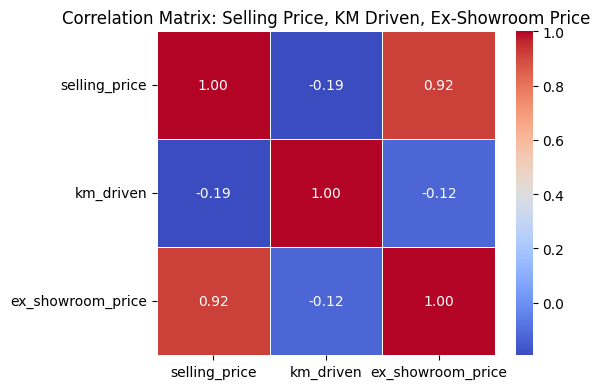

In [ ]:
#15.Develop a correlation matrix for numeric columns and visualize it using a heatmap.
selected_cols = ['selling_price', 'km_driven', 'ex_showroom_price']
df_subset = df[selected_cols].dropna()
correlation_matrix = df_subset.corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix: Selling Price, KM Driven, Ex-Showroom Price')
plt.tight_layout()
plt.show()


EDA 2

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [12]:
df = pd.read_csv('/content/Car Sale.csv')
df

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,C_CND_023902,12/31/2023,Martin,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,60504-7114,Passenger,8583598,Pasco
23902,C_CND_023903,12/31/2023,Jimmy,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Auto,Black,16000,06457-3834,Hardtop,7914229,Middletown
23903,C_CND_023904,12/31/2023,Emma,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,99301-3882,Sedan,7659127,Scottsdale
23904,C_CND_023905,12/31/2023,Victoire,Male,13500,Chrysler Plymouth,Chevrolet,Metro,DoubleÂ Overhead Camshaft,Auto,Black,31000,53546-9427,Passenger,6030764,Austin


In [3]:
df.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

In [15]:
exchange_rate = 83.25

# Convert USD to INR
df['Selling Price'] = df['Price ($)'] * exchange_rate

print(df)

             Car_id        Date Customer Name  Gender  Annual Income  \
0      C_CND_000001    1/2/2022     Geraldine    Male          13500   
1      C_CND_000002    1/2/2022           Gia    Male        1480000   
2      C_CND_000003    1/2/2022        Gianna    Male        1035000   
3      C_CND_000004    1/2/2022       Giselle    Male          13500   
4      C_CND_000005    1/2/2022         Grace    Male        1465000   
...             ...         ...           ...     ...            ...   
23901  C_CND_023902  12/31/2023        Martin    Male          13500   
23902  C_CND_023903  12/31/2023         Jimmy  Female         900000   
23903  C_CND_023904  12/31/2023          Emma    Male         705000   
23904  C_CND_023905  12/31/2023      Victoire    Male          13500   
23905  C_CND_023906  12/31/2023       Donovan    Male        1225000   

                               Dealer_Name    Company       Model  \
0      Buddy Storbeck's Diesel Service Inc       Ford  Expedition 

In [16]:
df.drop('Price ($)', axis=1, inplace=True)

In [17]:
df.rename(columns={'Selling Price': 'Selling Price'}, inplace=True)

In [18]:
df

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Dealer_No,Body Style,Phone,Dealer_Region,Selling Price
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,06457-3834,SUV,8264678,Middletown,2164500.0
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,60504-7114,SUV,6848189,Aurora,1581750.0
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,38701-8047,Passenger,7298798,Greenville,2622375.0
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,99301-3882,SUV,6257557,Pasco,1165500.0
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,53546-9427,Hatchback,7081483,Janesville,2039625.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,C_CND_023902,12/31/2023,Martin,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,60504-7114,Passenger,8583598,Pasco,999000.0
23902,C_CND_023903,12/31/2023,Jimmy,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Auto,Black,06457-3834,Hardtop,7914229,Middletown,1332000.0
23903,C_CND_023904,12/31/2023,Emma,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,99301-3882,Sedan,7659127,Scottsdale,1748250.0
23904,C_CND_023905,12/31/2023,Victoire,Male,13500,Chrysler Plymouth,Chevrolet,Metro,DoubleÂ Overhead Camshaft,Auto,Black,53546-9427,Passenger,6030764,Austin,2580750.0


#1.What is the average selling price of cars for each dealer, and how does it compare across different dealers?

In [8]:
average_price = df.groupby('Dealer_Name')['Selling Price'].mean().reset_index()

# Sort by average price (optional)
average_price = average_price.sort_values(by='Selling Price', ascending=False)

# Show result
print(average_price)

                                        Dealer_Name  Selling Price
27                                        U-Haul CO   2.406577e+06
19                             Rabun Used Car Sales   2.398815e+06
11                                  Iceberg Rentals   2.392446e+06
22                                 Saab-Belle Dodge   2.364374e+06
13                      Motor Vehicle Branch Office   2.361582e+06
9                        Gartner Buick Hyundai Saab   2.356973e+06
10                              Hatfield Volkswagen   2.356800e+06
26                               Tri-State Mack Inc   2.346041e+06
5                                     Classic Chevy   2.340438e+06
1                                  C & M Motors Inc   2.338941e+06
2                                       Capitol KIA   2.338372e+06
23                Scrivener Performance Engineering   2.337816e+06
14                                   Nebo Chevrolet   2.337504e+06
18  Progressive Shippers Cooperative Association No   2.331110

In [9]:
#2. Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends?
variation = df.groupby('Company')['Selling Price'].agg(
    Price_StdDev='std',
    Price_Range=lambda x: x.max() - x.min()
).reset_index()

# Sort by highest standard deviation
variation = variation.sort_values(by='Price_StdDev', ascending=False)

print(variation)

       Company  Price_StdDev  Price_Range
4     Cadillac  1.622697e+06   6060600.00
24        Saab  1.606475e+06   4327335.00
15     Lincoln  1.594175e+06   6726600.00
21    Plymouth  1.590667e+06   5536208.25
14       Lexus  1.496216e+06   4786958.25
3        Buick  1.437690e+06   4229183.25
17     Mercury  1.361889e+06   5243917.50
19      Nissan  1.349468e+06   5552775.00
20  Oldsmobile  1.320273e+06   4960035.00
16  Mercedes-B  1.319646e+06   6976350.00
25      Saturn  1.319345e+06   4229100.00
8         Ford  1.312486e+06   5694300.00
27      Toyota  1.266145e+06   6127200.00
2          BMW  1.246419e+06   5036625.00
22     Pontiac  1.188460e+06   4895100.00
5    Chevrolet  1.121822e+06   6035625.00
11    Infiniti  1.099570e+06   3046950.00
1         Audi  1.063064e+06   6118875.00
26      Subaru  1.055582e+06   3371625.00
28  Volkswagen  1.055052e+06   5044950.00
29       Volvo  1.053005e+06   5877450.00
6     Chrysler  9.757041e+05   3313350.00
18  Mitsubishi  9.675840e+05   370

In [10]:
#3.What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare?
def iqr(series):
    q3 = series.quantile(0.75)
    q1 = series.quantile(0.25)
    return q3 - q1

# Calculate IQR and describe stats
distribution = df.groupby('Transmission')['Selling Price'].agg(
    Count='count',
    Min='min',
    Q1=lambda x: x.quantile(0.25),
    Median='median',
    Q3=lambda x: x.quantile(0.75),
    Max='max',
    IQR=iqr
).reset_index()

print(distribution)

  Transmission  Count       Min         Q1      Median          Q3        Max  \
0         Auto  10347   99900.0  1581750.0  1998000.00  2913833.25  6302025.0   
1       Manual   9298  141525.0  1415250.0  1831583.25  2830500.00  7142850.0   

          IQR  
0  1332083.25  
1  1415250.00  


In [11]:
#4.What is the distribution of car prices across different regions?
price_distribution = df.groupby('Dealer_Region')['Selling Price'].describe()

print(price_distribution)

                count          mean           std       min          25%  \
Dealer_Region                                                              
Aurora         2591.0  2.350529e+06  1.238062e+06  749250.0  1502704.125   
Austin         3399.0  2.355570e+06  1.238275e+06  749250.0  1498583.250   
Greenville     2557.0  2.347225e+06  1.240132e+06   99900.0  1498583.250   
Janesville     3131.0  2.321503e+06  1.199358e+06  357975.0  1498583.250   
Middletown     2579.0  2.318456e+06  1.223527e+06  141525.0  1498500.000   
Pasco          2574.0  2.344633e+06  1.222457e+06  749250.0  1540125.000   
Scottsdale     2814.0  2.329693e+06  1.246011e+06  120712.5  1498500.000   

                      50%           75%         max  
Dealer_Region                                        
Aurora         1914750.00  2.859638e+06  7142850.00  
Austin         1914750.00  2.913750e+06  7126283.25  
Greenville     1914750.00  2.872208e+06  7092900.00  
Janesville     1914750.00  2.830500e+06  7109

In [12]:
#5.What is the distribution of cars based on body styles?
body_style_distribution = df['Body Style'].value_counts()
print(body_style_distribution)

Body Style
SUV          5252
Hatchback    5179
Sedan        3669
Passenger    3283
Hardtop      2262
Name: count, dtype: int64


In [13]:
#6.How does the average selling price of cars vary by customer gender and annual income?
def categorize_income(income):
    if income < 40000:
        return 'Low'
    elif income < 70000:
        return 'Medium'
    else:
        return 'High'

df['Income Level'] = df['Annual Income'].apply(categorize_income)

# Group by Gender and Income Level and get average selling price
grouped = df.groupby(['Gender', 'Income Level'])['Selling Price'].mean().reset_index()

print(grouped)

   Gender Income Level  Selling Price
0  Female         High   2.355997e+06
1  Female          Low   2.334954e+06
2    Male         High   2.340837e+06
3    Male          Low   2.313817e+06


In [44]:
#7.What is the distribution of car prices by region, and how does the number of cars sold vary by region?
df['Selling Price'].value_counts()
df.groupby('Dealer_Region')['Selling Price'].count()
car_price_by_region = df.groupby('Dealer_Region')['Selling Price'].mean()
print(car_price_by_region)
print("." * 50)
car_sold_by_region = df.groupby('Dealer_Region')['Selling Price'].count()
print(car_sold_by_region)


Dealer_Region
Aurora        2.350529e+06
Austin        2.355570e+06
Greenville    2.347225e+06
Janesville    2.321503e+06
Middletown    2.318456e+06
Pasco         2.344633e+06
Scottsdale    2.329693e+06
Name: Selling Price, dtype: float64
..................................................
Dealer_Region
Aurora        2591
Austin        3399
Greenville    2557
Janesville    3131
Middletown    2579
Pasco         2574
Scottsdale    2814
Name: Selling Price, dtype: int64


In [27]:
#8.How does the average car price differ between cars with different engine sizes?
average_prices = df.groupby('Engine')['Selling Price'].mean()
print(average_prices)



Engine
DoubleÂ Overhead Camshaft    2.351880e+06
Overhead Camshaft            2.323352e+06
Name: Selling Price, dtype: float64


In [47]:
#9.How do car prices vary based on the customer’s annual income bracket?
avg_price_by_income = df.groupby('Annual Income')['Selling Price'].mean().reset_index()

print(avg_price_by_income)

      Annual Income  Selling Price
0           13500.0   2.318430e+06
1           85000.0   3.579750e+06
2          106000.0   3.829583e+06
3          121000.0   1.665000e+06
4          131000.0   1.415250e+06
...             ...            ...
2315      6500000.0   2.081250e+06
2316      6800000.0   1.248750e+06
2317      7650000.0   1.748250e+06
2318      8000000.0   7.076250e+06
2319     11200000.0   2.164583e+06

[2320 rows x 2 columns]


In [48]:
#10.What are the top 5 car models with the highest number of sales, and how does their price distribution looks?
top_models = df.groupby('Model')['Selling Price'].count().sort_values(ascending=False).head(5)
print(top_models)

Model
Silhouette    338
Diamante      338
Prizm         337
Jetta         332
Ram Pickup    321
Name: Selling Price, dtype: int64


In [52]:
#11.How does car price vary with engine size across different car colors, and which colors have the highest price variation?
price_variation_by_color = df.groupby('Color')['Selling Price'].std().reset_index()
price_variation_by_color = price_variation_by_color.sort_values(by='Selling Price', ascending=False)
print(price_variation_by_color)


        Color  Selling Price
2         Red   1.291305e+06
0       Black   1.271651e+06
1  Pale White   1.165030e+06


In [21]:
#12.Is there any seasonal trend in car sales based on the date of sale?
df['Date of Sale'] = pd.to_datetime(df['Date of Sale'])
df['Month'] = df['Date of Sale'].dt.month
monthly_sales = df.groupby('Month')['Selling Price'].count()
print(monthly_sales)



In [19]:
#13.How does the car price distribution change when considering different combinations of body style and transmission type?
body_transmission_price_distribution = df.groupby(['Body Style', 'Transmission'])['Selling Price'].describe()
print(body_transmission_price_distribution)


                          count          mean           std       min  \
Body Style Transmission                                                 
Hardtop    Auto          1408.0  2.624056e+06  1.139506e+06  999000.0   
           Manual        1563.0  2.249161e+06  1.171536e+06  915750.0   
Hatchback  Auto          3458.0  2.157053e+06  1.094239e+06  349650.0   
           Manual        2670.0  2.389487e+06  1.355647e+06  141525.0   
Passenger  Auto          2020.0  2.407243e+06  1.161045e+06  749250.0   
           Manual        1925.0  2.411713e+06  1.542097e+06  832500.0   
SUV        Auto          3086.0  2.289492e+06  1.107219e+06   99900.0   
           Manual        3288.0  2.171078e+06  1.217242e+06  183150.0   
Sedan      Auto          2599.0  2.493778e+06  1.191383e+06  999000.0   
           Manual        1889.0  2.469551e+06  1.285385e+06  915750.0   

                                 25%         50%         75%         max  
Body Style Transmission                         

In [44]:
#14.What is the correlation between car price, engine size, and annual income of customers, and how do these features interact?
df['Engine'] = pd.to_numeric(df['Engine'], errors='coerce')
df['Annual Income'] = pd.to_numeric(df['Annual Income'], errors='coerce')
df = df.dropna(subset=['Selling Price', 'Engine', 'Annual Income'])
correlation_matrix = df[['Selling Price', 'Engine', 'Annual Income']].corr()
print(correlation_matrix)


               Selling Price  Engine  Annual Income
Selling Price            NaN     NaN            NaN
Engine                   NaN     NaN            NaN
Annual Income            NaN     NaN            NaN


In [42]:
#15.How does the average car price vary across different car models and engine types?
average_price_by_model_engine = df.groupby(['Model', 'Engine'])['Selling Price'].mean().reset_index()
print(average_price_by_model_engine)

        Model                     Engine  Selling Price
0       3-Sep  DoubleÂ Overhead Camshaft   3.162366e+06
1      3000GT  DoubleÂ Overhead Camshaft   1.895130e+06
2      3000GT          Overhead Camshaft   1.812407e+06
3        300M  DoubleÂ Overhead Camshaft   1.781124e+06
4        323i  DoubleÂ Overhead Camshaft   1.393991e+06
..        ...                        ...            ...
256  Windstar          Overhead Camshaft   1.423598e+06
257  Wrangler  DoubleÂ Overhead Camshaft   1.760346e+06
258  Wrangler          Overhead Camshaft   1.560350e+06
259    Xterra  DoubleÂ Overhead Camshaft   1.327043e+06
260    Xterra          Overhead Camshaft   2.586786e+06

[261 rows x 3 columns]


EDA 3

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('/content/amazon (1).csv')
df

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,₹379,₹919,59%,4,"1,090",SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,280","₹3,045",25%,4.1,"4,118","230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the me

In [33]:
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [32]:
df.describe()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
count,1465,1465,1465,1465,1465,1465,1465,1463,1465,1465,1465,1465,1465,1465,1465,1465
unique,1351,1337,211,550,449,92,28,1143,1293,1194,1194,1194,1194,1212,1412,1465
top,B083342NKJ,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",Computers&Accessories|Accessories&Peripherals|...,₹199,₹999,50%,4.1,"9,378",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY...","$@|\|TO$|-|,Sethu madhav,Akash Thakur,Burger P...","R3F4T5TRYPTMIG,R3DQIEC603E7AY,R1O4Z15FD40PV5,R...","Worked on iPhone 7 and didn’t work on XR,Good ...","I am not big on camera usage, personally. I wa...",https://m.media-amazon.com/images/I/413sCRKobN...,https://www.amazon.in/Borosil-Jumbo-1000-Watt-...
freq,3,5,233,53,120,56,244,9,6,10,10,10,10,8,3,1


In [58]:
#1.What is the average rating for each product category?
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
average_rating = df.groupby('category')['rating'].mean()
print(average_rating)



category
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers                                                    3.800000
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters                                                   4.150000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets                                           3.500000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                                        3.600000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers                                           4.050000
                                                                                                                            ...   
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens        4.250000
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSu

In [59]:
#2.What are the top rating_count products by category?
df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce')
top_rating_products = df.groupby('category')['rating_count'].max()
print(top_rating_products)

category
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers                                                   NaN
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters                                                  NaN
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets                                          NaN
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                                       NaN
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers                                          NaN
                                                                                                                          ..
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens       NaN
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|LiquidInkRollerballPen

In [11]:
#3.What is the  of distribution discounted prices vs. actual prices?
if df.empty:
    print("The DataFrame is empty. Cannot perform groupby and plotting.")
else:
    # Proceed with groupby and plotting only if the DataFrame is not empty
    grouped_prices = df.groupby('discounted_price')['actual_price'].mean()

    # Check if the grouped result is empty
    if grouped_prices.empty:
        print("The grouped data for plotting is empty. Cannot plot.")
    else:
        grouped_prices.plot(kind='bar', figsize=(10, 6), color=['blue', 'green', 'orange', 'red', 'purple'])
        plt.title('distribution discounted prices vs. actual prices', size=25)
        plt.xlabel('discounted_price')
        plt.ylabel('actual_price')
        plt.xticks(rotation=45)
        plt.grid(axis='y', linestyle='--', alpha=0.5)
        for i, v in enumerate(grouped_prices):
             plt.text(i, v , f"{v:.2f}", ha='center', va='bottom', fontsize=12, color='black')

        plt.tight_layout()
        plt.show()

The DataFrame is empty. Cannot perform groupby and plotting.


In [17]:
#4.How does the average discount percentage vary across categories?
average_discount_by_category = df.groupby('category')['discount_percent'].mean()
print(average_discount_by_category)

Series([], Name: discount_percent, dtype: float64)


In [20]:
#5.What are the most popular product names?
df['product_name'] = df['product_name'].str.lower()
df['product_name'] = df['product_name'].str.strip()
popular_products = df['product_name'].value_counts().head(10)
print(popular_products)

Series([], Name: count, dtype: int64)


In [24]:
#6.What are the most popular product keywords?
df['product_id'] = df['product_id'].str.lower()
df['product_id'] = df['product_id'].str.strip()
popular_keywords = df['product_id'].value_counts().head(10)
print(popular_keywords)

Series([], Name: count, dtype: int64)


In [30]:
#7.What are the most popular product reviews?
popular_reviews = df['review_content'].value_counts().head(10)
print(popular_reviews)

Series([], Name: count, dtype: int64)


In [31]:
#8.What is the correlation between discounted_price and rating?
correlation = df['discounted_price'].corr(df['rating'])
print(correlation)

nan


In [33]:
#9.What are the Top 5 categories based on the highest ratings?
highest_rating = df.groupby('category')['rating'].mean().sort_values(ascending=False).head(5)
print(highest_rating)

Series([], Name: rating, dtype: object)


In [19]:
#10.Identify any potential areas for improvement or optimization based on the data analysis.
improvement_areas = df.describe()
print(improvement_areas)

       discounted_price  actual_price
count               0.0           0.0
mean                NaN           NaN
std                 NaN           NaN
min                 NaN           NaN
25%                 NaN           NaN
50%                 NaN           NaN
75%                 NaN           NaN
max                 NaN           NaN


EDA 4

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/content/spotify.csv')
df

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe
...,...,...,...,...,...
435,French Montana,Splash Brothers,44,221863,3fBsEOnzwtlkpS0LxXAZhN
436,Fat Joe,All The Way Up (feat. Infared),64,191900,7Ezwtgfw7khBrpvaNPtMoT
437,A$AP Ferg,"Work REMIX (feat. A$AP Rocky, French Montana, ...",69,283693,7xVLFuuYdAvcTfcP3IG3dS
438,Diddy,Another One Of Me (feat. 21 Savage),65,220408,4hGmQboiou09EwhcTWa0H6


In [9]:
#1.Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needful?
null_summary = df.isnull().sum()
has_nulls = null_summary.any()

# Step 2: Drop or fill nulls if any
if has_nulls:
    df_cleaned = df.dropna()
else:
    df_cleaned = df.copy()

# Step 3: Check for duplicate rows
duplicate_count = df_cleaned.duplicated().sum()

# Step 4: Drop duplicate rows if any
if duplicate_count > 0:
    df_cleaned = df_cleaned.drop_duplicates()

# Return summary of actions taken
{
    "Null Values Summary": null_summary,
    "Had Nulls": has_nulls,
    "Duplicate Rows Found": duplicate_count,
    "Final Shape of Data": df_cleaned.shape
}




{'Null Values Summary': Artist           0
 Track Name       0
 Popularity       0
 Duration (ms)    0
 Track ID         0
 dtype: int64,
 'Had Nulls': np.False_,
 'Duplicate Rows Found': np.int64(27),
 'Final Shape of Data': (413, 5)}

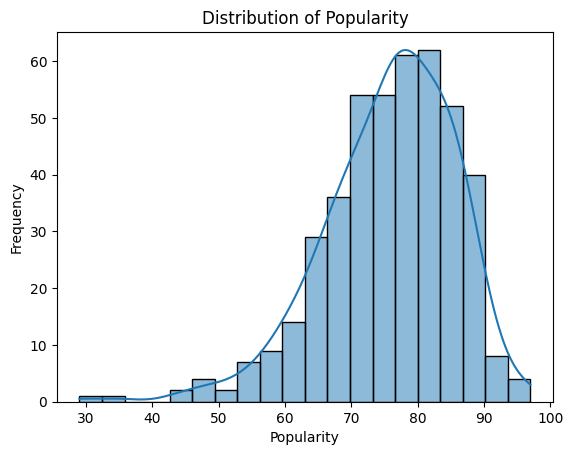

In [11]:
#2.What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram?
sns.histplot(df['Popularity'], bins=20, kde=True)
plt.title('Distribution of Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()


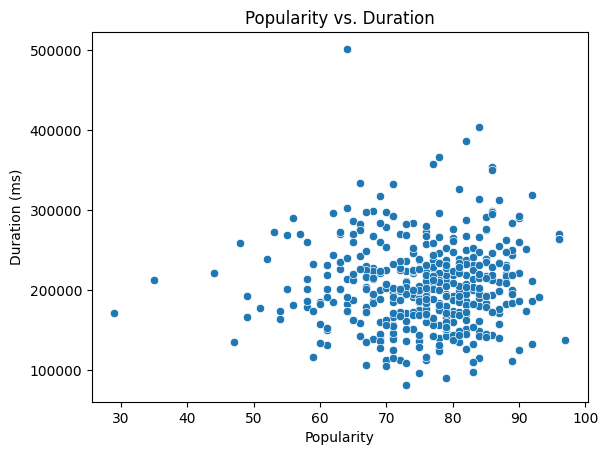

In [23]:
#3.Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot?
sns.scatterplot(data=df, x='Popularity', y='Duration (ms)')
plt.title('Popularity vs. Duration')
plt.xlabel('Popularity')
plt.ylabel('Duration (ms)')
plt.show()

Artist with the most tracks: Drake (20 tracks)


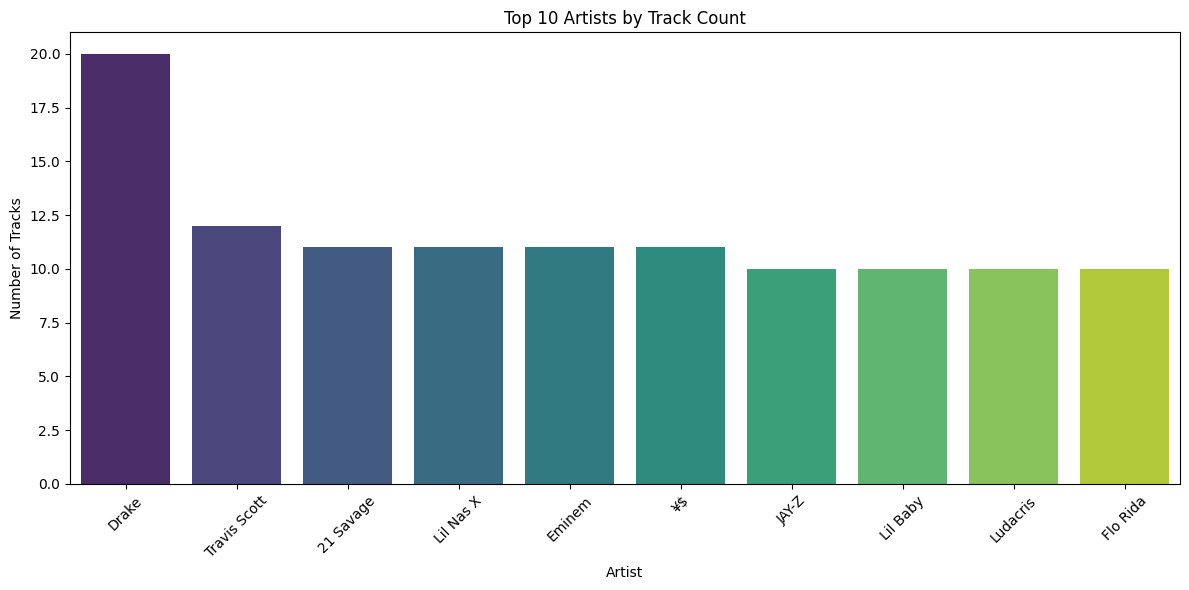

In [31]:
#4.Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot?
artist_col = 'Artist'  # Change to 'artist_name' if that's the correct column

# Count number of tracks per artist
artist_counts = df[artist_col].value_counts()

# Display the artist with the most tracks
top_artist = artist_counts.idxmax()
top_count = artist_counts.max()
print(f"Artist with the most tracks: {top_artist} ({top_count} tracks)")

# Plot countplot for top N artists (e.g., top 10)
top_n = 10
top_artists = artist_counts.head(top_n).reset_index()
top_artists.columns = ['artist', 'count']

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top_artists, x='artist', y='count', palette='viridis')
plt.title(f'Top {top_n} Artists by Track Count')
plt.xticks(rotation=45)
plt.xlabel('Artist')
plt.ylabel('Number of Tracks')
plt.tight_layout()
plt.show()


In [33]:
#5.What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each?
least_popular_tracks = df.nsmallest(5, 'Popularity')
print(least_popular_tracks[['Artist', 'Track Name', 'Popularity']])



             Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
413  French Montana                Splash Brothers          44
435  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47


Artist
21 Savage       84.181818
Jack Harlow     77.714286
Travis Scott    87.000000
¥$              86.090909
Name: Popularity, dtype: float64


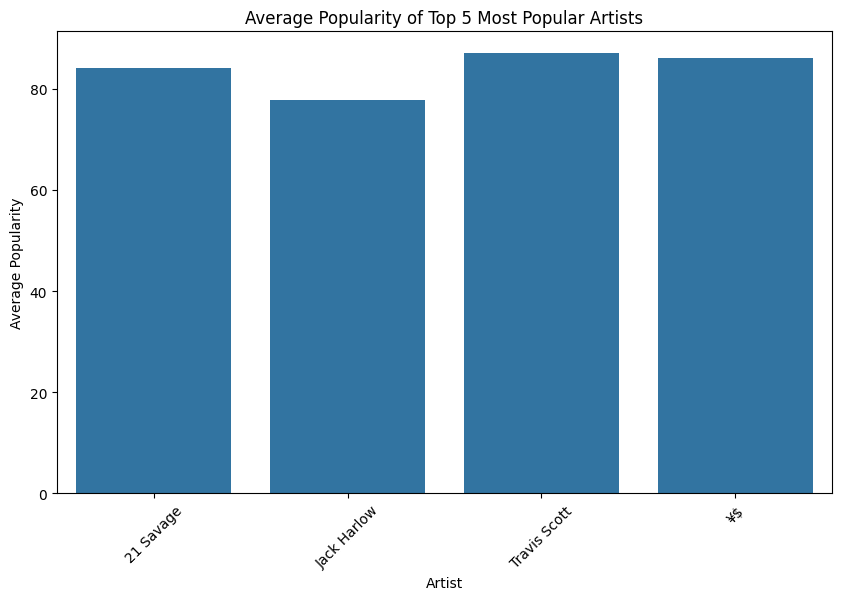

In [35]:
#6.Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist?
top_artists = df.nlargest(5, 'Popularity')['Artist'].unique()
avg_popularity_by_artist = df[df['Artist'].isin(top_artists)].groupby('Artist')['Popularity'].mean()
print(avg_popularity_by_artist)
fig = plt.figure(figsize=(10, 6))
sns.barplot(x=avg_popularity_by_artist.index, y=avg_popularity_by_artist.values)
plt.title('Average Popularity of Top 5 Most Popular Artists')
plt.xlabel('Artist')
plt.ylabel('Average Popularity')
plt.xticks(rotation=45)
plt.show()

In [36]:
#7.For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist?
top_artists = df.nlargest(5, 'Popularity')['Artist'].unique()
top_tracks_by_artist = df[df['Artist'].isin(top_artists)].groupby('Artist')['Track Name'].apply(list)
print(top_tracks_by_artist)


Artist
21 Savage       [née-nah, redrum, née-nah, n.h.i.e., Glock In ...
Jack Harlow     [Lovin On Me, First Class, Tyler Herro, WHATS ...
Travis Scott    [MELTDOWN (feat. Drake), FE!N (feat. Playboi C...
¥$              [CARNIVAL, BURN, FUK SUMN, BACK TO ME, STARS, ...
Name: Track Name, dtype: object


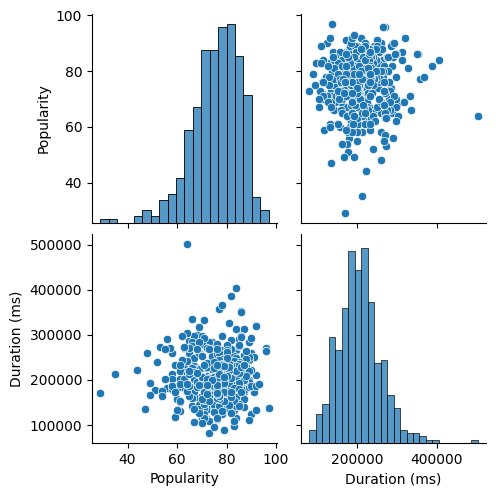

In [39]:
#8.Visualize relationships between multiple numerical variables simultaneously using a pair plot.
numerical_columns = ['Popularity', 'Duration (ms)']
sns.pairplot(df[numerical_columns])
plt.show()

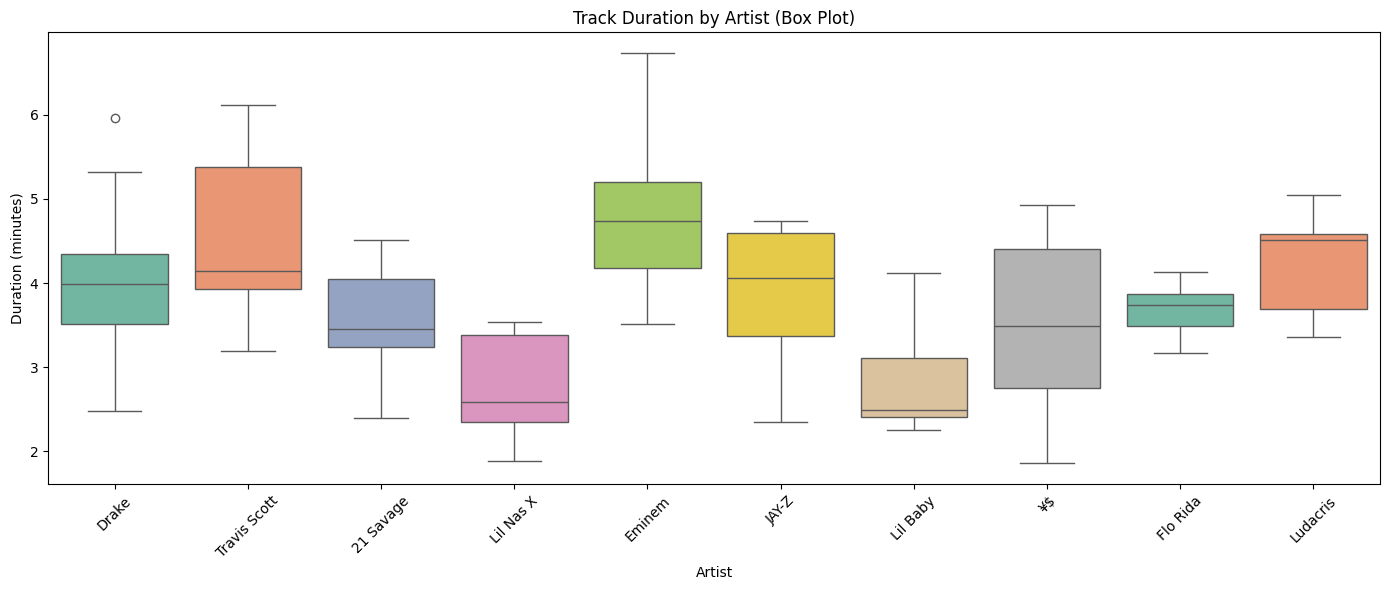

In [55]:
#9.Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot.
artist_col = 'Artist'
duration_col = 'Duration (ms)'  # usually in milliseconds

# Optional: Convert duration to minutes for readability
df['duration_min'] = df[duration_col] / 60000

# Filter for top N artists (e.g., top 10)
top_n_artists = df[artist_col].value_counts().head(10).index
df_top = df[df[artist_col].isin(top_n_artists)]

# Box Plot
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_top, x=artist_col, y='duration_min', palette='Set2')
plt.title("Track Duration by Artist (Box Plot)")
plt.ylabel("Duration (minutes)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

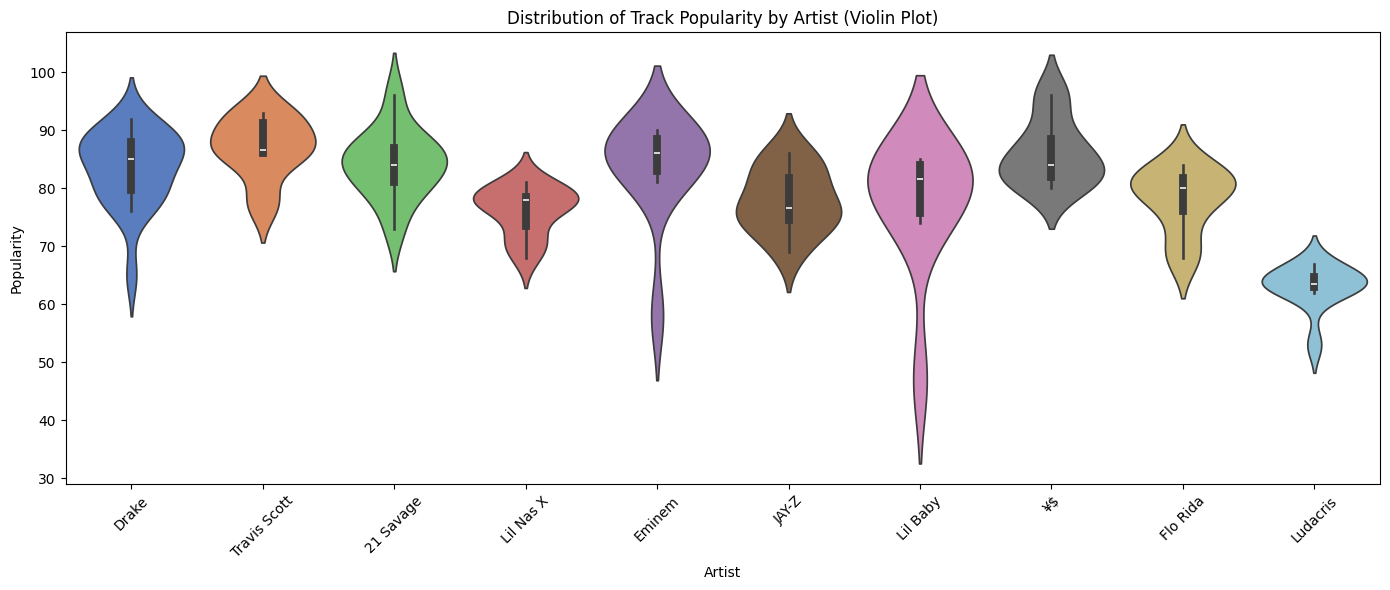

In [44]:
#10.How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot?
artist_col = 'Artist'
popularity_col = 'Popularity'

# Optional: Select top N artists to avoid overcrowding
top_n_artists = df[artist_col].value_counts().head(10).index
df_top = df[df[artist_col].isin(top_n_artists)]

# Violin Plot
plt.figure(figsize=(14, 6))
sns.violinplot(data=df_top, x=artist_col, y=popularity_col, palette="muted")
plt.title("Distribution of Track Popularity by Artist (Violin Plot)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

